# 손글씨 연습 (이미지)
[Tensorflow 102 - 4 이미지 구경하기 (실습)](https://www.youtube.com/watch?v=1TKiJoQYQ_4&list=PLl1irxoYh2wzOOU9hvJqMYc215wAlxrpp&index=4)

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [11]:
#mnist: 손글씨
(mnist_x, mnist_y),_ = tf.keras.datasets.mnist.load_data()
print(mnist_x.shape, mnist_y.shape)
#cifar: 10가지 사물 분류
(cifar_x, cifar_y), _ = tf.keras.datasets.cifar10.load_data()
print(cifar_x.shape, cifar_y.shape)
# 각각 numpy.ndarray 형식임

(60000, 28, 28) (60000,)
(50000, 32, 32, 3) (50000, 1)


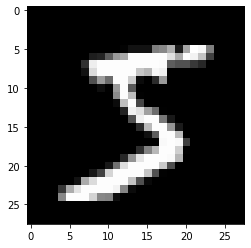

In [18]:
#이미지 보여주기
plt.imshow(mnist_x[0], cmap='gray')

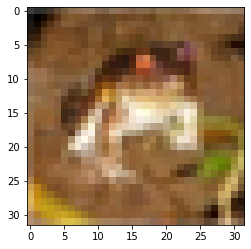

In [19]:
plt.imshow(cifar_x[0])

In [21]:
# np로 표만드는법
# d1 = np.array([3,4])

## 학습시작.flatten

In [72]:
독립, 종속 = mnist_x, mnist_y
#독립 = 독립.reshape(60000,784) # 28*28 2차원을 1차원으로 바뀜... -> flatten 레이어를 통해 할 수 있다.
종속 = pd.get_dummies(종속)
print(독립.shape, 종속.shape)

(60000, 28, 28) (60000, 10)


In [73]:
#X = tf.keras.layers.Input(shape=28*28)
X = tf.keras.layers.Input(shape=[28,28])
H = tf.keras.layers.Flatten()(X)
H = tf.keras.layers.Dense(84, activation='swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)
model = tf.keras.models.Model(X,Y)
model.compile(loss='categorical_crossentropy',metrics='accuracy')
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 84)                65940     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                850       
Total params: 66,790
Trainable params: 66,790
Non-trainable params: 0
_________________________________________________________________


In [76]:
epochs = 10
history = model.fit(독립, 종속, epochs=epochs)

Epoch 1/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3266 - accuracy: 0.9566
Epoch 2/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3403 - accuracy: 0.9578
Epoch 3/50
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3155 - accuracy: 0.9592
Epoch 4/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3158 - accuracy: 0.9620
Epoch 5/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3084 - accuracy: 0.9608
Epoch 6/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2993 - accuracy: 0.9626
Epoch 7/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2806 - accuracy: 0.9638
Epoch 8/50
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2753 - accuracy: 0.9643
Epoch 9/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2871 - accuracy: 0.9653
Epoch 10/50
1875/1875 [==============================] - 12s 7ms/step - l

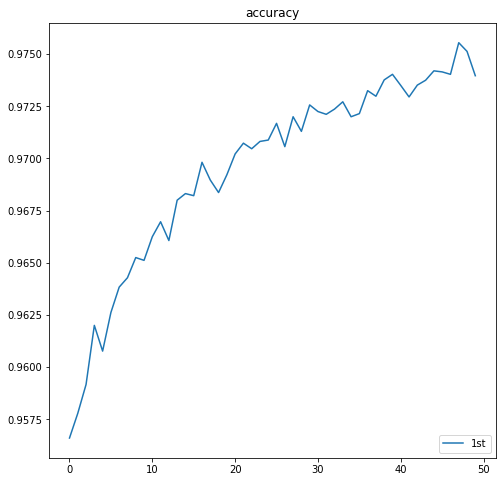

In [77]:
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, history.history['accuracy'], label='1st')
plt.legend(loc='lower right')
plt.title('accuracy')
plt.show()

In [71]:
print(model.predict(독립[0:5]).round(4), mnist_y[0:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]] [5 0 4 1 9]


## conv2d 
- 합성곱 연산을 통해, 사진의 특징을 찾는 것임


In [88]:
독립, 종속 = mnist_x, mnist_y
독립 = 독립.reshape(60000,28,28,1) # 28*28 2차원을 1차원으로 바뀜... -> flatten 레이어를 통해 할 수 있다.
종속 = pd.get_dummies(종속)
print(독립.shape, 종속.shape)

(60000, 28, 28, 1) (60000, 10)


In [87]:
#X = tf.keras.layers.Input(shape=28*28)
X = tf.keras.layers.Input(shape=[28,28,1]) # 굳이 3차원을 받아야 conv를 사용할 수 있다. 컬러-3차원
H = tf.keras.layers.Conv2D(3, kernel_size=5, activation='swish')(X) # Conv2D, 필터 개수 = 3채널 특징맵, 커널사이즈 = 필터셋 사이즈.  즉,  필터[i]: 5*5*1, for i in 필터: 필터[i](28*28) // 결과: (28-5+1)*(28-5+1). 참고로 필터는 컴퓨터가 찾은 것이다.
H = tf.keras.layers.Conv2D(6, kernel_size=5, activation='swish')(H)
H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(84, activation='swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)
model_2 = tf.keras.models.Model(X,Y)
model_2.compile(loss='categorical_crossentropy',metrics='accuracy')
model_2.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 3)         78        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 20, 20, 6)         456       
_________________________________________________________________
flatten_2 (Flatten)          (None, 2400)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 84)                201684    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                850       
Total params: 203,068
Trainable params: 203,068
Non-trainable params: 0
_____________________________________________________

In [90]:

epochs = 10
history2 = model_2.fit(독립, 종속, epochs=epochs)

Epoch 1/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.1317 - accuracy: 0.9636
Epoch 2/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0777 - accuracy: 0.9785
Epoch 3/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0510 - accuracy: 0.9855
Epoch 4/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0387 - accuracy: 0.9889
Epoch 5/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0320 - accuracy: 0.9911
Epoch 6/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0268 - accuracy: 0.9928
Epoch 7/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0260 - accuracy: 0.9930
Epoch 8/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0226 - accuracy: 0.9941
Epoch 9/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0191 - accuracy: 0.9948
Epoch 10/10
1875/1875 [==============================] - 47s 25m

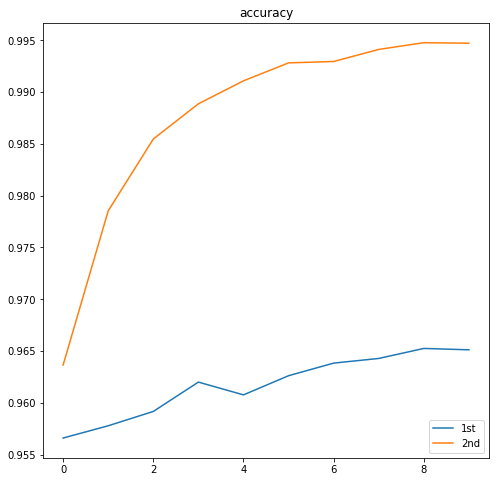

In [103]:
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, history.history['accuracy'][:10], label='1st')
plt.plot(epochs_range, history2.history['accuracy'], label='2nd')
plt.legend(loc='lower right')
plt.title('accuracy')
plt.show()

## MaxPool2D 사용하기
- 가중치의 개수를 적당히 줄이자
- 2*2로 줄인 다음, 최대값만 남기자... max인 이유는, 특징맵의 특징이 잘 보이게 하기 위함.

In [104]:
X = tf.keras.layers.Input(shape=[28,28,1])

H = tf.keras.layers.Conv2D(3, kernel_size=5, activation='swish')(X) 
H = tf.keras.layers.MaxPool2D()(H)
H = tf.keras.layers.Conv2D(6, kernel_size=5, activation='swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(84, activation='swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)
model_3 = tf.keras.models.Model(X,Y)
model_3.compile(loss='categorical_crossentropy',metrics='accuracy')
model_3.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 3)         78        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 3)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 6)           456       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 6)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 96)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 84)                8148

In [105]:

epochs = 10
history3 = model_3.fit(독립, 종속, epochs=epochs)


Epoch 1/10
1875/1875 [==============================] - 41s 21ms/step - loss: 1.1235 - accuracy: 0.8690
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1304 - accuracy: 0.9621
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0974 - accuracy: 0.9714
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0831 - accuracy: 0.9755
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0759 - accuracy: 0.9781
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0730 - accuracy: 0.9789
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0689 - accuracy: 0.9798
Epoch 8/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0677 - accuracy: 0.9809
Epoch 9/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0671 - accuracy: 0.9810
Epoch 10/10
1875/1875 [==============================] - 32s 17m

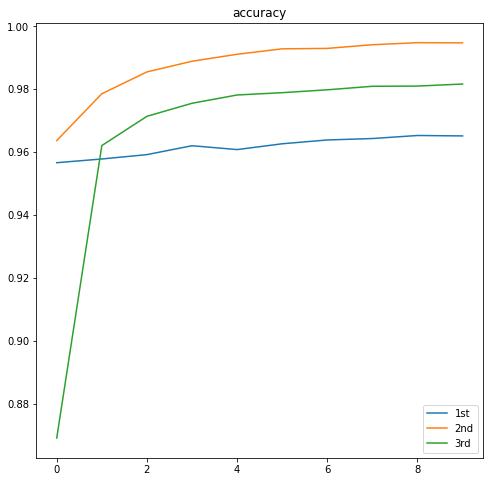

In [106]:
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, history.history['accuracy'][:10], label='1st')
plt.plot(epochs_range, history2.history['accuracy'], label='2nd')
plt.plot(epochs_range, history3.history['accuracy'], label='3rd')
plt.legend(loc='lower right')
plt.title('accuracy')
plt.show()

# Lenet  알고리즘(?)
- 1997에 뭐시기 과학자가 만든 것이다

In [109]:
X = tf.keras.layers.Input(shape=[28,28,1])

H = tf.keras.layers.Conv2D(6, kernel_size=5, padding='same', activation='swish')(X)  #padding은 크기 안줄어들게 강제로 막은 것임. 0으로 체워짐
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(16, kernel_size=5, activation='swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(120, activation='swish')(H)
H = tf.keras.layers.Dense(84, activation='swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)
model_4 = tf.keras.models.Model(X,Y)
model_4.compile(loss='categorical_crossentropy',metrics='accuracy')
model_4.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 120)               4812

In [110]:

epochs = 10
history4 = model_4.fit(독립, 종속, epochs=epochs)


Epoch 1/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.4174 - accuracy: 0.9351
Epoch 2/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0917 - accuracy: 0.9759
Epoch 3/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0733 - accuracy: 0.9814
Epoch 4/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0647 - accuracy: 0.9841
Epoch 5/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0620 - accuracy: 0.9849
Epoch 6/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0562 - accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0526 - accuracy: 0.9880
Epoch 8/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0520 - accuracy: 0.9881
Epoch 9/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0519 - accuracy: 0.9888
Epoch 10/10
1875/1875 [==============================] - 81s 43m

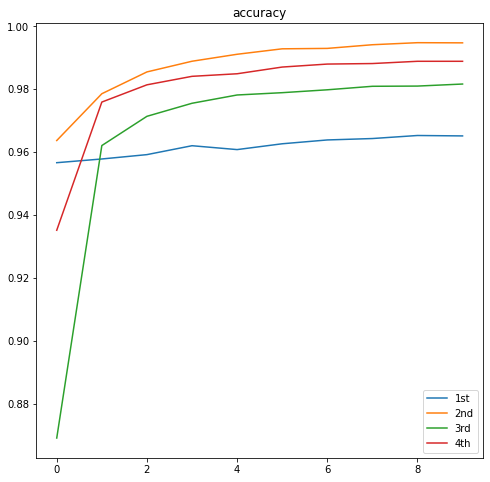

In [111]:
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, history.history['accuracy'][:10], label='1st')
plt.plot(epochs_range, history2.history['accuracy'], label='2nd')
plt.plot(epochs_range, history3.history['accuracy'], label='3rd')
plt.plot(epochs_range, history4.history['accuracy'], label='4th')
plt.legend(loc='lower right')
plt.title('accuracy')
plt.show()